# **Energy Production Prediction Using Deep Learning**

In [ ]:
# !pip install tensorflow==2.12.0

**Import Historical Data**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/intermittent-renewables-production-france-csv.csv')

In [5]:
df.head()

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,07/22/2020,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,07/23/2020,7:00:00,8:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,07/23/2020,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,07/23/2020,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,07/23/2020,23:00:00,24:00:00,Solar,0.0,205,Thursday,July


**Data PreProcessing**

Datatype Analysis and find Missing Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59806 entries, 0 to 59805
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Hour  59806 non-null  object 
 1   Date           59806 non-null  object 
 2   StartHour      59806 non-null  object 
 3   EndHour        59806 non-null  object 
 4   Source         59806 non-null  object 
 5   Production     59804 non-null  float64
 6   dayOfYear      59806 non-null  int64  
 7   dayName        59806 non-null  object 
 8   monthName      59806 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.1+ MB


In [16]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,59806,2021-10-13 23:46:29.539511040,2020-01-01 00:00:00,2020-12-08 00:00:00,2021-10-15 12:00:00,2022-08-23 00:00:00,2023-06-30 00:00:00,NaN
Production,59806.0,2792.894776,0.0,42.0,1871.0,4053.75,17220.0,3190.268818
dayOfYear,59806.0,172.45472,1.0,84.0,164.0,262.0,366.0,104.937607


**Convert date-related columns into proper datetime objects**

In [7]:
df['Date and Hour'] = pd.to_datetime(df['Date and Hour'], utc=True)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59806 entries, 0 to 59805
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Date and Hour  59806 non-null  datetime64[ns, UTC]
 1   Date           59806 non-null  datetime64[ns]     
 2   StartHour      59806 non-null  object             
 3   EndHour        59806 non-null  object             
 4   Source         59806 non-null  object             
 5   Production     59804 non-null  float64            
 6   dayOfYear      59806 non-null  int64              
 7   dayName        59806 non-null  object             
 8   monthName      59806 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 4.1+ MB


**Handle missing values**

In [10]:
df.isna().sum()

,0
Date and Hour,0
Date,0
StartHour,0
EndHour,0
Source,0
Production,2
dayOfYear,0
dayName,0
monthName,0


In [11]:
df['Production'] = df['Production'].fillna(method='ffill')

In [12]:
df.isna().sum()

,0
Date and Hour,0
Date,0
StartHour,0
EndHour,0
Source,0
Production,0
dayOfYear,0
dayName,0
monthName,0


**Create additional time-based features like hour and quarter**

In [20]:
df['hour'] = df.index.hour
df['quarter'] = df.index.quarter

**.Exploratory Data Analysis (EDA)**

In [13]:
df.set_index('Date and Hour', inplace=True)

In [14]:
color_pal = sns.color_palette()

<Axes: title={'center': 'Energy Production by Date'}, xlabel='Date and Hour'>

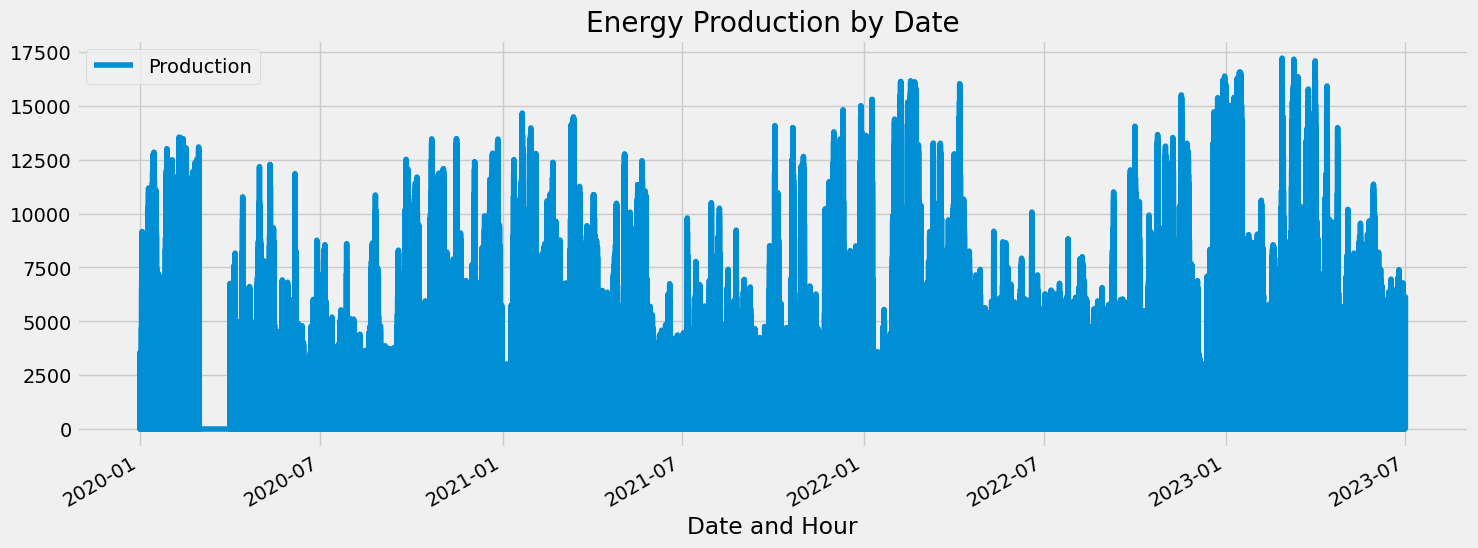

In [15]:

df.plot(y='Production', figsize=(16, 6), color=color_pal[0],title="Energy Production by Date")


Energy production consistently decreases during the months of August, September, and October each year, while it gradually increases in January, February, and March.

<Axes: title={'center': 'Energy Production for the week of 2021-01-01'}, xlabel='Date and Hour'>

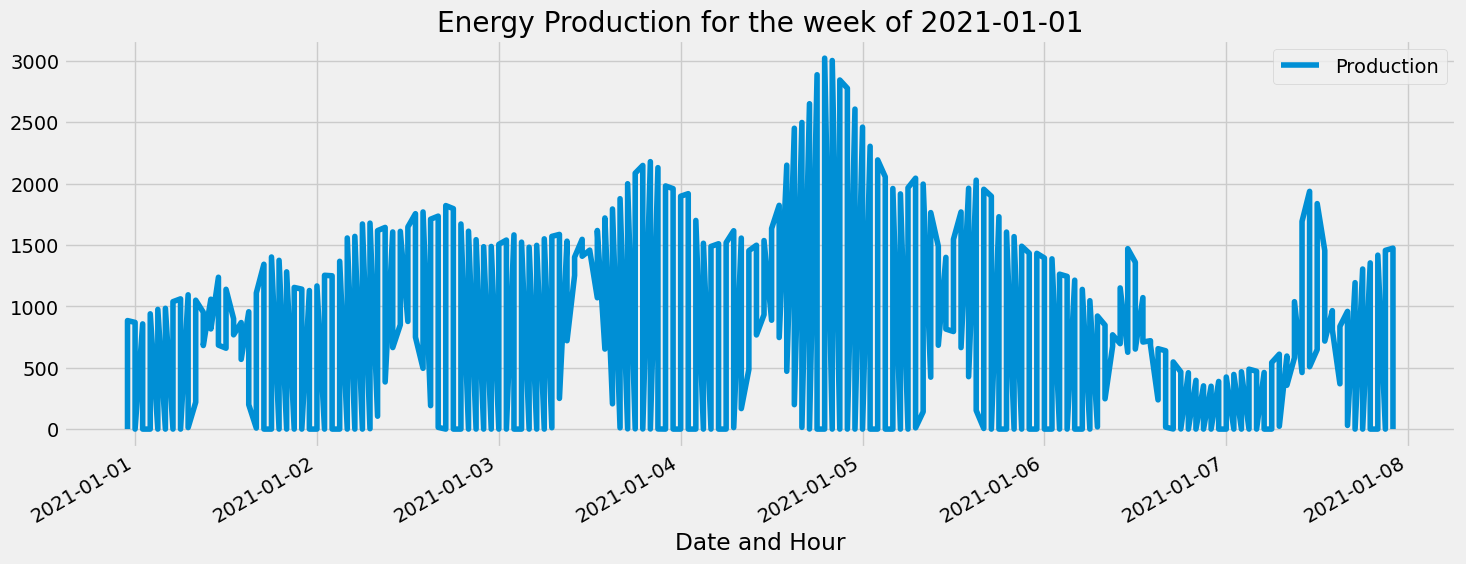

In [18]:

df.loc[(df['Date'] >= '2021-01-01') & (df['Date'] < '2021-01-08')].plot(y='Production', figsize=(16, 6), color=color_pal[0], title="Energy Production for the week of 2021-01-01")


<Axes: title={'center': 'Energy Production for the week of 2022-01-01'}, xlabel='Date and Hour'>

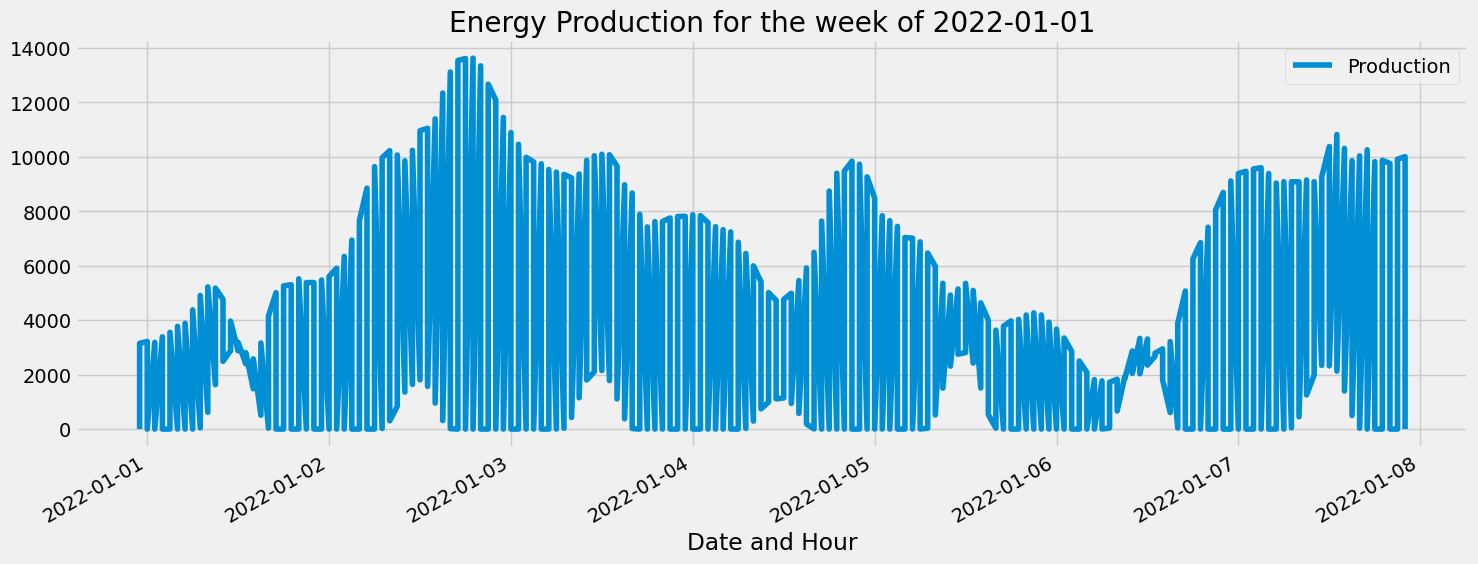

In [19]:

df.loc[(df['Date'] >= '2022-01-01') & (df['Date'] < '2022-01-08')].plot(y='Production', figsize=(16, 6), color=color_pal[0], title="Energy Production for the week of 2022-01-01")


A random analysis of weekday hourly production reveals that energy generation peaks between 11 AM and 2 PM, mainly due to the sun being at its highest and providing maximum solar energy during these hours.

In [21]:
df = df.reset_index()

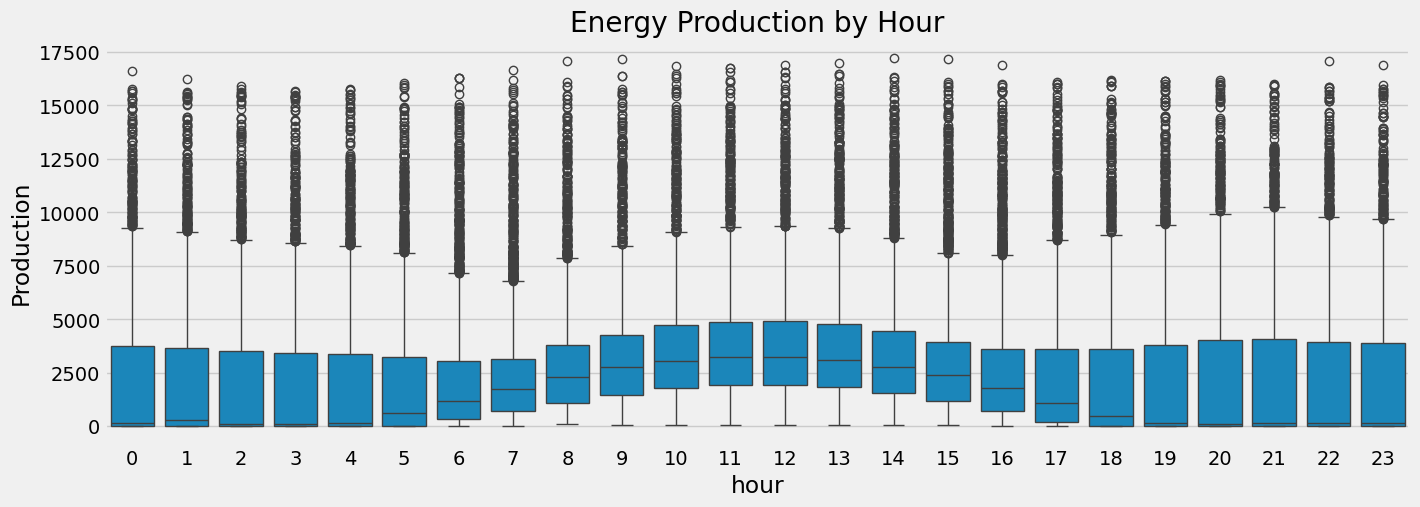

In [22]:
fig,ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x='hour', y='Production')
ax.set_title('Energy Production by Hour')
plt.show()


The data shows that energy production is highest between 8 AM and 5 PM, primarily due to high temperatures during these hours. This trend is clearly illustrated in the box plot, which highlights the strong correlation between peak production and elevated temperatures.

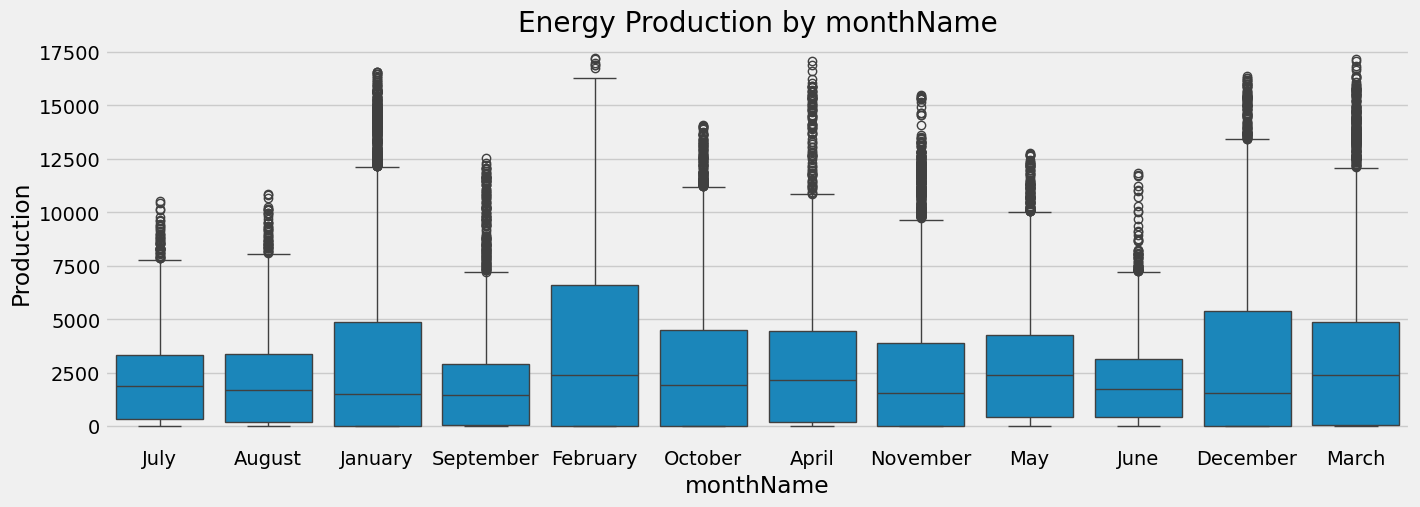

In [23]:
fig,ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x='monthName', y='Production')
ax.set_title('Energy Production by monthName')
plt.show()


Energy production is highest during December, January, February, and March due to the summer season, while September experiences significantly lower production, primarily due to the rainy season.

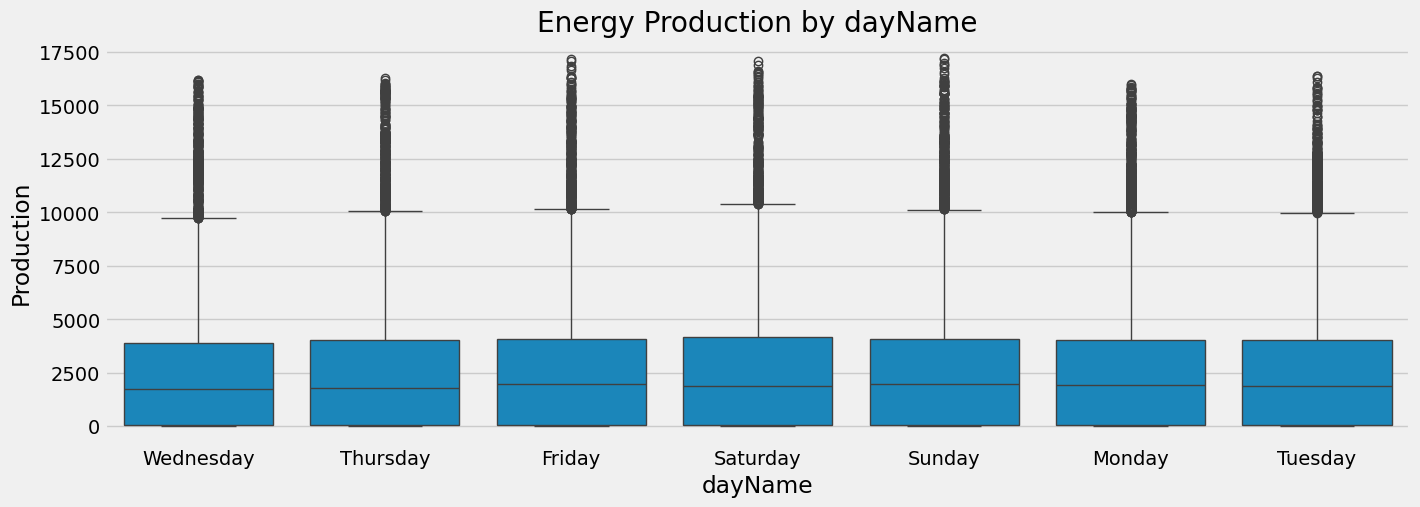

In [24]:
fig,ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x='dayName', y='Production')
ax.set_title('Energy Production by dayName')
plt.show()

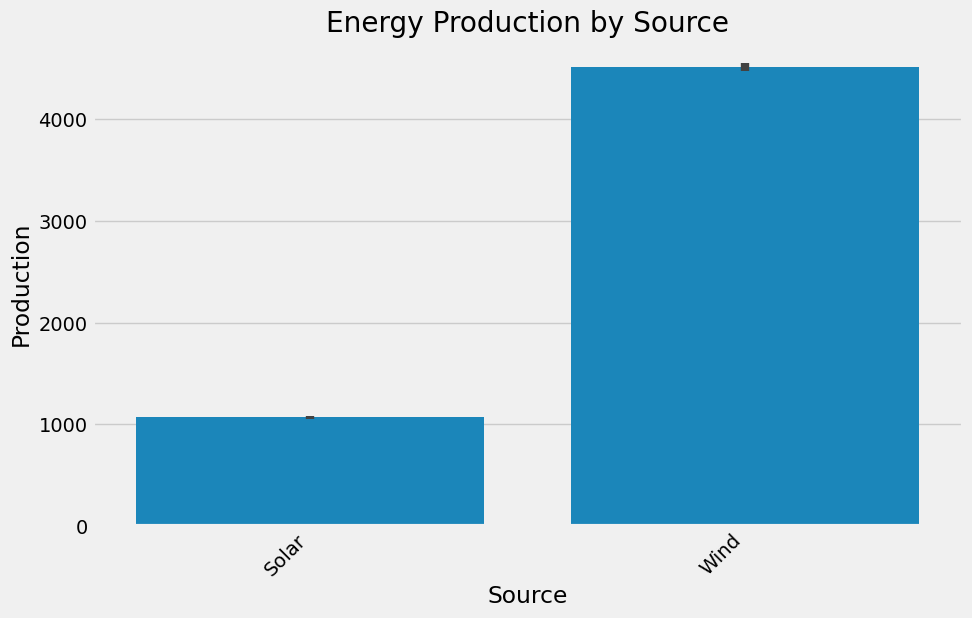

In [25]:


fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x='Source', y='Production', ax=ax)
ax.set_title('Energy Production by Source')
plt.xticks(rotation=45, ha='right')
plt.show()


Wind energy production is significantly higher compared to solar energy generation.

In [26]:
df.head()

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName,hour,quarter
0,2020-07-22 18:00:00+00:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July,18,3
1,2020-07-23 05:00:00+00:00,2020-07-23,7:00:00,8:00:00,Solar,223.0,205,Thursday,July,5,3
2,2020-07-23 14:00:00+00:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July,14,3
3,2020-07-23 17:00:00+00:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July,17,3
4,2020-07-23 21:00:00+00:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July,21,3


In [27]:
data = df.drop(['Date and Hour','Date','StartHour','EndHour'],axis =1)
data.head()

,Source,Production,dayOfYear,dayName,monthName,hour,quarter
0,Solar,244.0,204,Wednesday,July,18,3
1,Solar,223.0,205,Thursday,July,5,3
2,Solar,2517.0,205,Thursday,July,14,3
3,Solar,658.0,205,Thursday,July,17,3
4,Solar,0.0,205,Thursday,July,21,3


**Encoding the Categricale Values Using Label Encoder**

In [28]:
data_cat = data.select_dtypes(include='object').columns
data_num = data.select_dtypes(exclude='object').columns

In [29]:

data_cat

Index(['Source', 'dayName', 'monthName'], dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le= LabelEncoder()
# Iterate over each categorical column and apply LabelEncoder separately
for col in data_cat:
    data[col] = le.fit_transform(data[col])

**Normalize features such as production values**

In [34]:
# prompt: normalize Production column 0-1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Production'] = scaler.fit_transform(data[['Production']])


In [35]:
data

,Source,Production,dayOfYear,dayName,monthName,hour,quarter
0,0,0.014170,204,6,5,18,3
1,0,0.012950,205,4,5,5,3
2,0,0.146167,205,4,5,14,3
3,0,0.038211,205,4,5,17,3
4,0,0.000000,205,4,5,21,3
...,...,...,...,...,...,...,...
59801,0,0.003194,181,0,6,4,2
59802,0,0.264460,181,0,6,11,2
59803,0,0.266492,181,0,6,12,2
59804,0,0.242334,181,0,6,14,2


**Train Test Split**

In [36]:
X=data.drop(['Production'],axis=1)
y=data['Production']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Selection and Building**

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam

**Baseline Model**

In [39]:
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)


LinearRegression()

In [40]:
baseline_predictions = baseline_model.predict(X_test)

**LinearRegression Evaluvation Metrics**

In [41]:
baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_mae = mean_absolute_error(y_test, baseline_predictions)
baseline_r2 = r2_score(y_test, baseline_predictions)

print(f"Baseline MSE: {baseline_mse}, MAE: {baseline_mae}, R2 Score: {baseline_r2}")

Baseline MSE: 0.025059945753331495, MAE: 0.11836943880682954, R2 Score: 0.2921794480971084


In [42]:

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**RandomForest Evaluation Metrics**

In [43]:
# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest MSE: {rf_mse}, MAE: {rf_mae}, R2 Score: {rf_r2}")


Random Forest MSE: 0.0018688169862377693, MAE: 0.023789392234656096, R2 Score: 0.9472150864321618


**Deep Learning Model: Build a model using LSTM (Long Short-Term Memory)**

In [57]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape the data for LSTM input (samples, timesteps, features)
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
# Building the LSTM model
lstm_model = Sequential()
# First LSTM layer with ReLU activation
lstm_model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.2))
# Second LSTM layer with ReLU activation
lstm_model.add(LSTM(units=50, activation='relu'))
lstm_model.add(Dropout(0.2))
# Output layer without activation (linear activation by default)
lstm_model.add(Dense(units=1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')



In [46]:
# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32)

Epoch 1/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0280
Epoch 2/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0235
Epoch 3/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0220
Epoch 4/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0206
Epoch 5/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0200
Epoch 6/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0201
Epoch 7/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0195
Epoch 8/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0194
Epoch 9/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0194
Epoch 10/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0191
Epoch 11/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0186
Epoch 12/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0192
Epoch 13/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0190
Epoch 14/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0188
Epoch 15/10

In [47]:

# Make predictions
lstm_predictions = lstm_model.predict(X_test_lstm)

374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [48]:
# Evaluate the model
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)

print(f"LSTM MSE: {lstm_mse}, MAE: {lstm_mae}, R2 Score: {lstm_r2}")

LSTM MSE: 0.017758040531360632, MAE: 0.08755918927467903, R2 Score: 0.4984224557648693


**Hyperparameter Tuning**

In [ ]:
# !pip install --upgrade tensorflow

In [49]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.8 MB/s eta 0:00:00


In [50]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import optimizers
from keras_tuner import HyperModel, RandomSearch

# Define the hypermodel
class LSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()

        # Tune the number of LSTM units
        lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=16)

        # First LSTM layer with ReLU activation
        model.add(LSTM(units=lstm_units, activation='relu', return_sequences=True,
                       input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
        model.add(Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)))

        # Second LSTM layer
        model.add(LSTM(units=lstm_units, activation='relu'))
        model.add(Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)))

        # Output layer
        model.add(Dense(units=1))

        # Compile the model
        model.compile(optimizer=optimizers.Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                      loss='mean_squared_error')
        return model


In [58]:
print(X_train_lstm.shape)
print(X_test_lstm.shape)

(47844, 1, 6)
(11962, 1, 6)


In [ ]:
# Initialize the hypermodel
lstm_hypermodel = LSTMHyperModel()

# Set up the tuner
tuner = RandomSearch(
    lstm_hypermodel,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='lstm_tuner',
    project_name='lstm_hyperparam_tuning'
)

# Fit the tuner
tuner.search(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_test_lstm, y_test))

Trial 1 Complete [00h 16m 29s]
val_loss: 0.01825125887989998

Best val_loss So Far: 0.01825125887989998
Total elapsed time: 00h 16m 29s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
32                |32                |lstm_units
0.3               |0.4               |dropout_1
0.1               |0.5               |dropout_2
0.00023547        |0.0015383         |learning_rate

Epoch 1/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2391 - val_loss: 0.0321
Epoch 2/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0325 - val_loss: 0.0271
Epoch 3/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0276 - val_loss: 0.0239
Epoch 4/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0246 - val_loss: 0.0232
Epoch 5/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0238 - val_loss: 0.0230
Epoch 6/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.0222 - val_loss: 0.0226
Epoch 7/100
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 8s 6m